## Datetime - epoch is from Unix time 0 (midnight 1/1/1970)

## PS2 - What day of the week was 1/1/1970

In [33]:
myArray = np.array([1,2,3,4,5,6,7])
mySeries = pd.Series(myArray)
mySeries.index = pd.date_range(start='1/1/1970', periods=7)
mySeries.index.dayofweek

Int64Index([3, 4, 5, 6, 0, 1, 2], dtype='int64')

In [53]:
import datetime
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
ThisDate    = datetime.date(1970,1,1)
thisXDate = ThisDate.weekday()
thisDateAsString = weekDays[thisXDate]
print("This date was {}".format(thisXMasDayAsString))

This date was Thursday


In [37]:
date = pd.DataFrame({'inputDate':['1970-01-01']}) 
date['inputDate'] = pd.to_datetime(date['inputDate']) 
date['dayOfWeek'] = date['inputDate'].dt.day_name() 
  
date 

,inputDate,dayOfWeek
0,1970-01-01,Thursday


## PS2 - UFO Data - Handling Time, Day of Week etc
### What day of the week has the most sightings?
### On the day with most sightings plot a histogram the time of day the sightings occured
### Do the same for the day with the 2nd most sightings
### For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.

In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [51]:
ufo['Dayofweek']= ufo['Time'].dt.day_name()

In [52]:
ufo

,City,Colors Reported,Shape Reported,State,Time,dayofweek,Dayofweek
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday,Sunday
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday,Monday
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday,Sunday
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday,Monday
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday,Tuesday
...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,Sunday,Sunday
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,Sunday,Sunday
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,Sunday,Sunday
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,Sunday,Sunday


In [54]:
ufo['Sightings']= 1
ufo

,City,Colors Reported,Shape Reported,State,Time,dayofweek,Dayofweek,Sightings
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday,Sunday,1
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday,Monday,1
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday,Sunday,1
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday,Monday,1
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday,Tuesday,1
...,...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,Sunday,Sunday,1
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,Sunday,Sunday,1
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,Sunday,Sunday,1
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,Sunday,Sunday,1


In [62]:
pt = pd.pivot_table(data=ufo, index = ['Dayofweek'],  values='Sightings', aggfunc=sum)
#pt
pt.sort_values(by='Sightings', ascending=False)

,Sightings
Dayofweek,
Tuesday,2822
Sunday,2689
Saturday,2687
Friday,2669
Thursday,2598
Wednesday,2476
Monday,2300


In [82]:
ufo['TIME_NEW'] = ufo['Time'].dt.strftime('%H')
ufo

,City,Colors Reported,Shape Reported,State,Time,dayofweek,Dayofweek,Sightings,TIME_NEW
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,Sunday,Sunday,1,22
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,Monday,Monday,1,20
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,Sunday,Sunday,1,14
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,Monday,Monday,1,13
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,Tuesday,Tuesday,1,19
...,...,...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,Sunday,Sunday,1,23
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,Sunday,Sunday,1,23
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,Sunday,Sunday,1,23
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,Sunday,Sunday,1,23


<AxesSubplot:xlabel='TIME_NEW'>

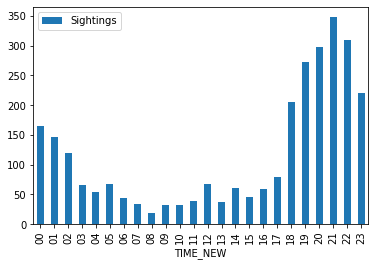

In [83]:
# max observations = ufo.Dayofweek == 'Tuesday'
pt3 = pd.pivot_table(ufo[ufo.Dayofweek == 'Tuesday'], index = ['TIME_NEW'],  values=['Sightings'], aggfunc=sum)
pt3
pt3.plot(kind='bar')

<AxesSubplot:xlabel='TIME_NEW'>

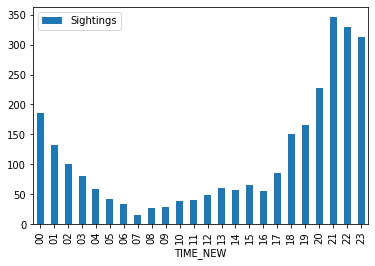

In [84]:
# pt2 = ufo.Dayofweek = 'Tuesday'
pt4 = pd.pivot_table(ufo[ufo.Dayofweek == 'Sunday'], index = ['TIME_NEW'],  values=['Sightings'], aggfunc=sum)
pt4
pt4.plot(kind='bar')